# Laboratorio 1: Regresión en Boston

En este laboratorio deben hacer experimentos de regresión con el conjunto de datos "Boston house prices dataset".

Estudiarán el dataset, harán visualizaciones y seleccionarán atributos relevantes a mano.

Luego, entrenarán y evaluarán diferentes tipos de regresiones, buscando las configuraciones que mejores resultados den.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Carga del Conjunto de Datos

Cargamos el conjunto de datos y vemos su contenido.

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [45]:
# print(boston['DESCR'])   # descripción del dataset
# boston['data']           # matriz con los datos de entrada (atributos)
# boston['target']         # vector de valores a predecir
# boston['feature_names']  # nombres de los atributos para cada columna de 'data'

In [8]:
boston['data'].shape, boston['target'].shape

((506, 13), (506,))

## División en Entrenamiento y Evaluación

Dividimos aleatoriamente los datos en 80% para entrenamiento y 20% para evaluación:

In [9]:
from sklearn.model_selection import train_test_split
X, y = boston['data'], boston['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)
X_train.shape, X_test.shape

((404, 13), (102, 13))

## Ejercicio 1: Descripción de los Datos y la Tarea

Responda las siguientes preguntas:

1. ¿De qué se trata el conjunto de datos?
2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?
3. ¿Qué información (atributos) hay disponibles para hacer la predicción?
4. ¿Qué atributos imagina ud. que serán los más determinantes para la predicción?
5. ¿Qué problemas observa a priori en el conjunto de datos? ¿Observa posibles sesgos, riesgos, dilemas éticos, etc? Piense que los datos pueden ser utilizados para hacer predicciones futuras.

**No hace falta escribir código para responder estas preguntas.**

## Ejercicio 2: Visualización de los Datos

1. Para cada atributo de entrada, haga una gráfica que muestre su relación con la variable objetivo.
2. Estudie las gráficas, identificando **a ojo** los atributos que a su criterio sean los más informativos para la predicción.
3. Para ud., ¿cuáles son esos atributos? Lístelos en orden de importancia.

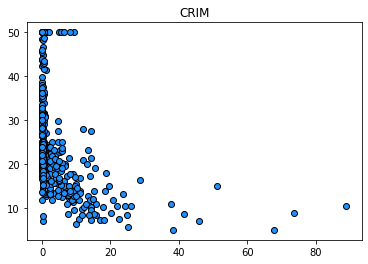

In [36]:
# 1. Resolver acá. Ayuda/ejemplo:
feature = 'CRIM'
selector = (boston['feature_names'] == feature)
plt.scatter(X[:, selector], y, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.title(feature)
plt.show()

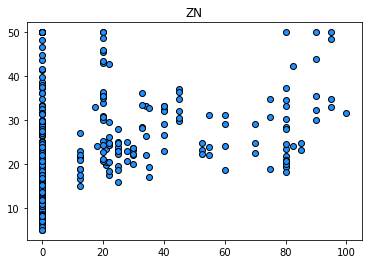

In [40]:
# 2. ZN proportion of residential land zoned for lots over 25,000 sq.ft.
feature = 'ZN'
selector = (boston['feature_names'] == feature)
plt.scatter(X[:, selector], y, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.title(feature)
plt.show()

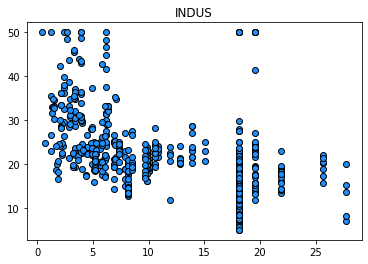

In [42]:
# 3. INDUS proportion of non-retail business acres per town
feature = 'INDUS'
selector = (boston['feature_names'] == feature)
plt.scatter(X[:, selector], y, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.title(feature)
plt.show()

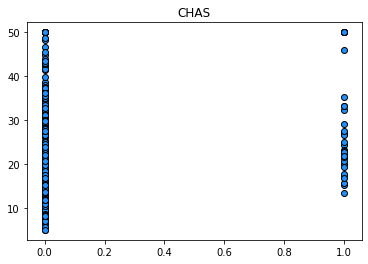

In [43]:
# 4. CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
feature = 'CHAS'
selector = (boston['feature_names'] == feature)
plt.scatter(X[:, selector], y, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.title(feature)
plt.show()

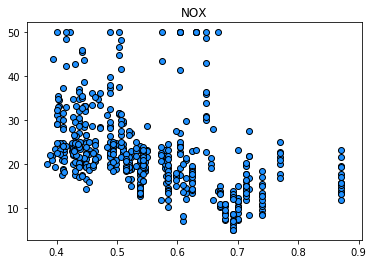

In [46]:
# 5. NOX nitric oxides concentration (parts per 10 million)
feature = 'NOX'
selector = (boston['feature_names'] == feature)
plt.scatter(X[:, selector], y, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.title(feature)
plt.show()

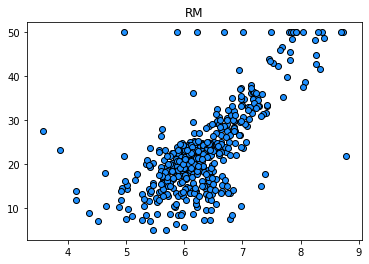

In [47]:
# 6. RM average number of rooms per dwelling
feature = 'RM'
selector = (boston['feature_names'] == feature)
plt.scatter(X[:, selector], y, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.title(feature)
plt.show()

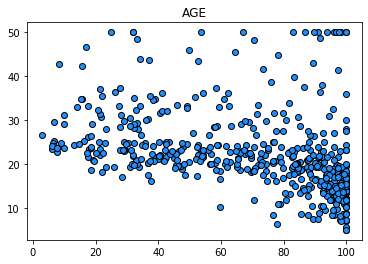

In [48]:
# 7. AGE proportion of owner-occupied units built prior to 1940
feature = 'AGE'
selector = (boston['feature_names'] == feature)
plt.scatter(X[:, selector], y, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.title(feature)
plt.show()

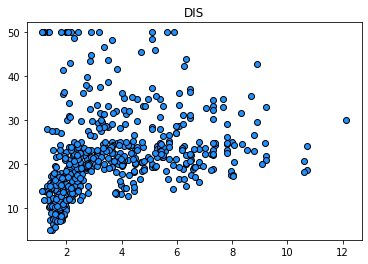

In [49]:
# 8. DIS weighted distances to five Boston employment centres
feature = 'DIS'
selector = (boston['feature_names'] == feature)
plt.scatter(X[:, selector], y, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.title(feature)
plt.show()

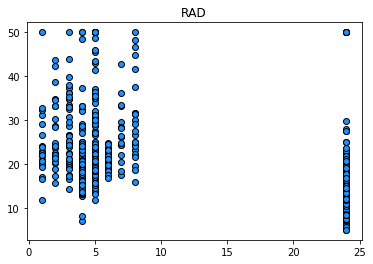

In [50]:
# 9. RAD index of accessibility to radial highways
feature = 'RAD'
selector = (boston['feature_names'] == feature)
plt.scatter(X[:, selector], y, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.title(feature)
plt.show()

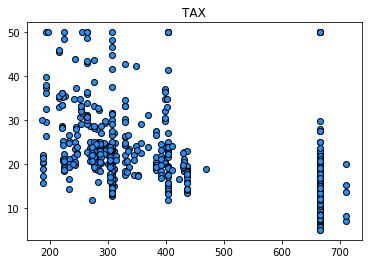

In [51]:
# 10. TAX full-value property-tax rate per $10,000
feature = 'TAX'
selector = (boston['feature_names'] == feature)
plt.scatter(X[:, selector], y, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.title(feature)
plt.show()

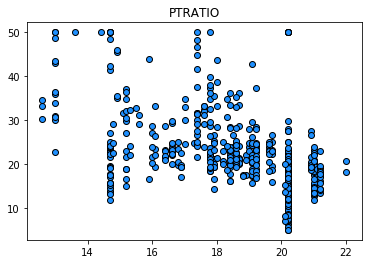

In [52]:
# 11. PTRATIO pupil-teacher ratio by town
feature = 'PTRATIO'
selector = (boston['feature_names'] == feature)
plt.scatter(X[:, selector], y, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.title(feature)
plt.show()

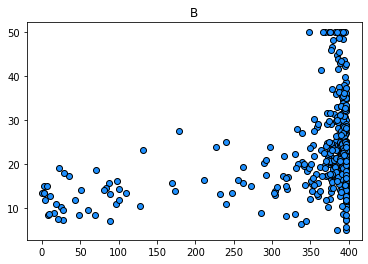

In [53]:
# 12. B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
feature = 'B'
selector = (boston['feature_names'] == feature)
plt.scatter(X[:, selector], y, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.title(feature)
plt.show()

LSTAT Proportion of population that is lower status = 1/2 (proportion of adults without, some high school education and proportion of male workers classified as laborers). The logarithmic specification implies that socioeconomic status distinctions mean more in the upper brackets of society than in the lower classes. Source: 1970 U. S. Census

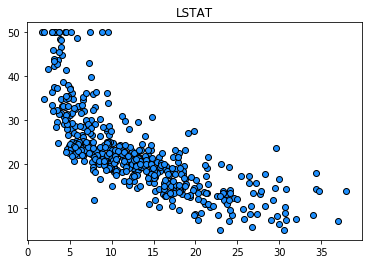

In [54]:
# 13. LSTAT % lower status of the population
feature = 'LSTAT'
selector = (boston['feature_names'] == feature)
plt.scatter(X[:, selector], y, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.title(feature)
plt.show()

In [57]:
# 14. MEDV Median value of owner-occupied homes in $1000's
# feature = 'MEDV'
# selector = (boston['feature_names'] == feature)
# plt.scatter(X[:, selector], y, facecolor="dodgerblue", edgecolor="k", label="datos")
# plt.title(feature)
# plt.show()

# MEDV no contine datos ya que es la variable objetivo.

Desde mi punto de vista los atributos que son mas informativos para la prediccion son:

1. **LSTAT**    % lower status of the population
2. **RM**       average number of rooms per dwelling
3. **B**        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
4. **DIS**      weighted distances to five Boston employment centre
5. **PTRATIO**  pupil-teacher ratio by town
6. **CRIM**     per capita crime rate by town
7. **RAD**      index of accessibility to radial highways


## Ejercicio 3: Regresión Lineal

1. Seleccione **un solo atributo** que considere puede ser el más apropiado.
2. Instancie una regresión lineal de **scikit-learn**, y entrénela usando sólo el atributo seleccionado.
3. Evalúe, calculando error cuadrático medio para los conjuntos de entrenamiento y evaluación.
4. Grafique el modelo resultante, junto con los puntos de entrenamiento y evaluación.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se puede obtener un error en test menor a 50.

In [91]:
# 1. Resolver acá. Ayuda:
# mas arriba se hizo el siguiente split
# X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)
feature = 'LSTAT'  # selecciono el atributo 'CRIM'
selector = (boston['feature_names'] == feature)
X_train_f = X_train[:, selector]
X_test_f = X_test[:, selector]
X_train_f.shape, X_test_f.shape

((404, 1), (102, 1))

In [124]:
np.max(X_train_f), np.min(X_train_f)

(36.98, 1.73)

In [114]:
# 2. Instanciar y entrenar acá.
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures # se encarga de la transformacion de los datos de entrada, es un modulo que hace un preprocesamiento de los datos
from sklearn.pipeline import make_pipeline # una secuenciacion de la transformacion para pasarlo como entrada de una regresion lineal.
from sklearn.metrics import mean_squared_error

degree = 1
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

model.fit(X_train_f, y_train)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=1, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [120]:
# 3. Predecir y evaluar acá.
y_train_pred = model.predict(X_train_f)
y_test_pred = model.predict(X_test_f) 

train_error = mean_squared_error(y_train, y_train_pred)
test_error = mean_squared_error(y_test, y_test_pred)
print(f'Train error: {train_error:0.5}')
print(f'Test error: {test_error:0.5}')

Train error: 36.524
Test error: 46.336


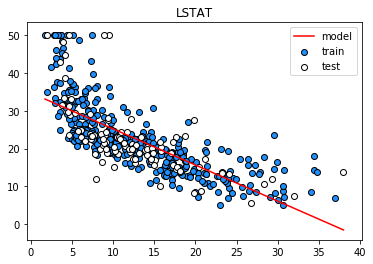

In [121]:
# 4. Graficar acá. Ayuda:
x_start = min(np.min(X_train_f), np.min(X_test_f))
x_end = max(np.max(X_train_f), np.max(X_test_f))

x = np.linspace(x_start, x_end, 200).reshape(-1, 1)
# plt.plot(x, model.predict(x), color="tomato", label="modelo")
plt.plot(x, model.predict(x), color="red", label="model")

plt.scatter(X_train_f, y_train, facecolor="dodgerblue", edgecolor="k", label="train")
plt.scatter(X_test_f, y_test, facecolor="white", edgecolor="k", label="test")
plt.title(feature)
plt.legend()
plt.show()

## Ejercicio 4: Regresión Polinomial

En este ejercicio deben entrenar regresiones polinomiales de diferente complejidad, siempre usando **scikit-learn**.

Deben usar **el mismo atributo** seleccionado para el ejercicio anterior.

1. Para varios grados de polinomio, haga lo siguiente:
    1. Instancie y entrene una regresión polinomial.
    2. Prediga y calcule error en entrenamiento y evaluación. Imprima los valores.
    3. Guarde los errores en una lista.
2. Grafique las curvas de error en términos del grado del polinomio.
3. Interprete la curva, identificando el punto en que comienza a haber sobreajuste, si lo hay.
4. Seleccione el modelo que mejor funcione, y grafique el modelo conjuntamente con los puntos.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se pueden obtener errores en test menores a 40 e incluso a 35.

In [142]:
# 1. Resolver acá.
#instanciamos las listas de errores para train y test.
train_errors = []
test_errors = []
degrees = [1,2,3,4,5,6,7,8,9,10,11,12]

for degree in degrees:
    #train
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train_f, y_train)
    
    #predict
    y_train_pred = model.predict(X_train_f)
    y_test_pred = model.predict(X_test_f)
    
    #evaluate
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)
    train_errors.append(train_error)
    test_errors.append(test_error)

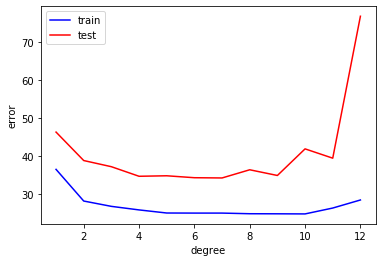

In [143]:
# 2. Graficar curvas de error acá.
plt.plot(degrees, train_errors, color="blue", label="train")
plt.plot(degrees, test_errors, color="red", label="test")
plt.legend()
plt.xlabel("degree")
plt.ylabel("error")
plt.show()

#### Test Error para grado 4 y 7

In [148]:
test_errors[3],test_errors[6]

(34.704868598088126, 34.261139476440434)

#### Comenzamos a construir el mejor modelo segun lo apreciado

In [152]:
# 4. Reconstruir mejor modelo acá y graficar.
model7 = make_pipeline(PolynomialFeatures(7), LinearRegression())
model7.fit(X_train_f, y_train)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=7, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [156]:
y_train_pred = model7.predict(X_train_f)
y_test_pred = model7.predict(X_test_f)

In [159]:
train_error = mean_squared_error(y_train, y_train_pred)
test_error = mean_squared_error(y_test, y_test_pred)

print('train_error: ', train_error)
print('test_error: ', test_error)

train_error:  25.013534969663986
test_error:  34.261139476440434


#### Agregamos modelo de grado 4, que aparentemente es similar en resultado al de grado 7

In [164]:
model4 = make_pipeline(PolynomialFeatures(4), LinearRegression())
model4.fit(X_train_f, y_train)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=4, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [169]:
y_train_pred_4 = model4.predict(X_train_f)
y_test_pred_4 = model4.predict(X_test_f)

train_error_4 = mean_squared_error(y_train, y_train_pred_4)
test_error_4 = mean_squared_error(y_test, y_test_pred_4)

print('train_error_4 ', train_error_4)
print('test_error_4 ', test_error_4)

train_error_4  25.849432858865946
test_error_4  34.704868598088126


#### Graficamos ambos modelos juntos para compararlos

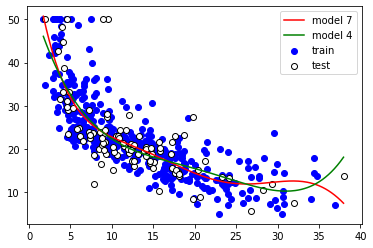

In [170]:
x_start = min(np.min(X_train_f), np.min(X_test_f))
x_end = max(np.max(X_train_f), np.max(X_test_f))

x = np.linspace(x_start, x_end, 200).reshape(-1, 1)

plt.scatter(X_train_f, y_train, color="blue", label="train")
plt.scatter(X_test_f, y_test, color="white", edgecolor="k", label="test")
plt.plot(x, model7.predict(x), color="red", label="model 7")
plt.plot(x, model4.predict(x), color="green", label="model 4")
# plt.plot(x, f_x, color="green", label="$\sin(2\pi x)$")
plt.legend()
plt.show()

## Ejercicio 5: Regresión con más de un Atributo

En este ejercicio deben entrenar regresiones que toman más de un atributo de entrada.

1. Seleccione **dos o tres atributos** entre los más relevantes encontrados en el ejercicio 2.
2. Repita el ejercicio anterior, pero usando los atributos seleccionados. No hace falta graficar el modelo final.
3. Interprete el resultado y compare con los ejercicios anteriores. ¿Se obtuvieron mejores modelos? ¿Porqué?

In [203]:
# 1. Resolver acá. Ayuda (con dos atributos):
selector = (boston['feature_names'] == 'LSTAT') | (boston['feature_names'] == 'RM' ) | (boston['feature_names'] == 'AGE' )
X_train_fs = X_train[:, selector]
X_test_fs = X_test[:, selector]
X_train_fs.shape, X_test_fs.shape

((404, 3), (102, 3))

In [208]:
# 2. Resolver acá.
train_errors_dual = []
test_errors_dual = []
degrees = [1,2,3,4,5]

for degree in degrees:
    model_dual = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model_dual.fit(X_train_fs, y_train)
    
    y_train_fs_pred = model_dual.predict(X_train_fs)
    y_test_fs_pred = model_dual.predict(X_test_fs)
    
    train_error_dual = mean_squared_error(y_train, y_train_fs_pred) 
    test_error_dual = mean_squared_error(y_test, y_test_fs_pred)
    
    train_errors_dual.append(train_error_dual)
    test_errors_dual.append(test_error_dual)

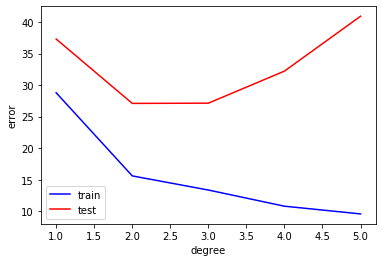

In [209]:
plt.plot(degrees, train_errors_dual, color="blue", label="train")
plt.plot(degrees, test_errors_dual, color="red", label="test")
plt.legend()
plt.xlabel("degree")
plt.ylabel("error")
plt.show()

In [206]:
train_errors_dual[2], test_errors_dual[2]

(13.367928158195934, 27.136871267448335)

In [207]:
train_errors_dual[3], test_errors_dual[3]

(10.806901448525887, 32.22142558324046)

## Más ejercicios (opcionales)

### Ejercicio 7: A Todo Feature

Entrene y evalúe regresiones pero utilizando todos los atributos de entrada (va a andar mucho más lento). Estudie los resultados.

### Ejercicio 8: Regularización

Entrene y evalúe regresiones con regularización "ridge". Deberá probar distintos valores de "alpha" (fuerza de la regularización). ¿Mejoran los resultados?


### Respuesta Ejercicio 7

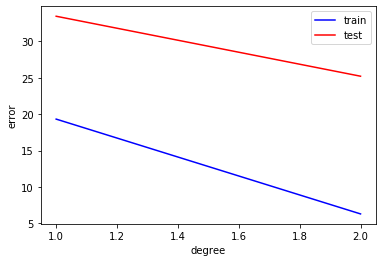

In [222]:
# 1. Resolver acá. Ayuda (con dos atributos):
# selector = (boston['feature_names'] == 'LSTAT') | (boston['feature_names'] == 'RM' ) | (boston['feature_names'] == 'AGE' )
X_train_fs = X_train
X_test_fs = X_test
X_train_fs.shape, X_test_fs.shape

# 2. Resolver acá.
train_errors_dual = []
test_errors_dual = []
degrees = [1,2]

for degree in degrees:
    model_dual = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model_dual.fit(X_train_fs, y_train)
    
    y_train_fs_pred = model_dual.predict(X_train_fs)
    y_test_fs_pred = model_dual.predict(X_test_fs)
    
    train_error_dual = mean_squared_error(y_train, y_train_fs_pred) 
    test_error_dual = mean_squared_error(y_test, y_test_fs_pred)
    
    train_errors_dual.append(train_error_dual)
    test_errors_dual.append(test_error_dual)
    
plt.plot(degrees, train_errors_dual, color="blue", label="train")
plt.plot(degrees, test_errors_dual, color="red", label="test")
plt.legend()
plt.xlabel("degree")
plt.ylabel("error")
plt.show()    

In [223]:
test_errors_dual[2]

IndexError: list index out of range